In [1]:
import time
n_multi = 50

import multiprocessing

import numpy as np

from deap import benchmarks

import matplotlib.pyplot as plt
%matplotlib inline

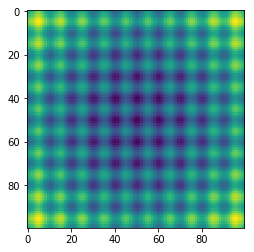

In [2]:
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
xm,ym = np.meshgrid(x,y)

z = np.zeros_like(xm)

for k in range(xm.shape[1]):
    for i in range(xm.shape[0]):
        z[i,k] = benchmarks.rastrigin((xm[i,k],ym[i,k]))[0]


plt.imshow(z)

In [3]:
def sample():   
    rx = np.random.uniform(-5,5)
    ry = np.random.uniform(-5,5)
    return [rx,ry]

def evaluation(params):
    score = benchmarks.rastrigin(params)[0]
    time.sleep(0.01)
    return - score

In [4]:
t = time.time()
best_score=-1000
for k in range(1000):
    param = sample()
    score = evaluation(param)
    if score > best_score:
        best_score = score
        best_param = param
    
print('best:',best_score)
print('time:',time.time() - t)

('best:', -0.5014844171326089)
('time:', 10.070941925048828)


In [5]:

def worker(x):
    np.random.seed(x)
    param = sample()
    score = evaluation(param)
    return score

import multiprocessing as mp
t = time.time()
pool = mp.Pool(24)
callback = pool.map(worker,range(1000))
best_score = np.max(callback)

print('best:',best_score)
print('time:',time.time()-t)

('best:', -1.2726214032521597)
('time:', 0.7236311435699463)


In [14]:
class searcher():
    def __init__(self):
        self.best_score = -10000
    def sample_evaluation(self):
        x = sample()
        score = evaluation(x)
        if self.best_score < score:
            self.best_score = score

In [15]:

def worker(x):
    s.sample_evaluation()

import multiprocessing as mp
t = time.time()
s = searcher()
pool = mp.Pool(24)
pool.map(worker,range(1000))

print('best:',s.best_score)
print('time:',time.time()-t)

-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.2472568483
-30.247256

-15.505533839
-15.505533839
-2.23709626946
-2.23709626946
-15.505533839
-15.505533839
-2.23709626946
-15.505533839
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-15.505533839
-2.23709626946
-15.505533839
-15.505533839
-15.505533839
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-15.505533839
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23709626946
-2.23